# Analysis from ENADE microdata for 2019

## Import libs

In [1]:
import pandas as pd
from apyori import apriori

## Read microdata file

In [2]:
data = pd.read_csv('../microdata/microdata-enade-2019.csv', sep=';', encoding='ISO-8859-1', low_memory=False)
data

,nu_ano_enade,co_ies,no_ies,sg_ies,co_mantenedora_ies,no_mantenedora_ies,tp_categoria_administrativa_ies,no_categoria_administrativa_ies,tp_organizacao_academica_ies,no_organizacao_academica_ies,...,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81
0,2019,568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,390.0,UNIVERSIDADE ESTADUAL DO MARANHAO,2.0,Pública Estadual,1.0,Universidade,...,9,9,9,9,9,9,9,9,9,9
1,2019,568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,390.0,UNIVERSIDADE ESTADUAL DO MARANHAO,2.0,Pública Estadual,1.0,Universidade,...,9,9,9,9,9,9,9,9,9,9
2,2019,568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,390.0,UNIVERSIDADE ESTADUAL DO MARANHAO,2.0,Pública Estadual,1.0,Universidade,...,9,9,9,9,9,9,9,9,9,9
3,2019,568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,390.0,UNIVERSIDADE ESTADUAL DO MARANHAO,2.0,Pública Estadual,1.0,Universidade,...,9,9,9,9,9,9,9,9,9,9
4,2019,568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,390.0,UNIVERSIDADE ESTADUAL DO MARANHAO,2.0,Pública Estadual,1.0,Universidade,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433922,2019,3371,CENTRO UNIVERSITÁRIO DE PATOS DE MINAS,UNIPAM,2128.0,FUNDACAO EDUCACIONAL DE PATOS DE MINAS,5.0,Privada sem fins lucrativos,2.0,Centro Universitário,...,9,9,9,9,9,9,9,9,9,9
433923,2019,3371,CENTRO UNIVERSITÁRIO DE PATOS DE MINAS,UNIPAM,2128.0,FUNDACAO EDUCACIONAL DE PATOS DE MINAS,5.0,Privada sem fins lucrativos,2.0,Centro Universitário,...,9,9,9,9,9,9,9,9,9,9
433924,2019,3371,CENTRO UNIVERSITÁRIO DE PATOS DE MINAS,UNIPAM,2128.0,FUNDACAO EDUCACIONAL DE PATOS DE MINAS,5.0,Privada sem fins lucrativos,2.0,Centro Universitário,...,9,9,9,9,9,9,9,9,9,9
433925,2019,3371,CENTRO UNIVERSITÁRIO DE PATOS DE MINAS,UNIPAM,2128.0,FUNDACAO EDUCACIONAL DE PATOS DE MINAS,5.0,Privada sem fins lucrativos,2.0,Centro Universitário,...,9,9,9,9,9,9,9,9,9,9


## Select only columns of interest

In [3]:
interest_columns = [
    'no_categoria_administrativa_ies',
    'no_organizacao_academica_ies',
    'no_regiao_ies',
    'no_grau_academico',
    'no_modalidade',
    'faixa_etaria',
    'tp_sexo',
    'no_pres',
    'nt_ger',
    'q1', # Estado civil
    'q2', # Cor ou raça
    'q4', # Escolaridade do pai
    'q5', # Escolaridade da mãe
    'q8', # Renda total da família
    'q9', # Situação financeira
    'q10', # Situação de trabalho
    'q15', # Entrou por alguma política afirmativa?
    'q17', # Em que tipo de escola cursou o EM?
    'q21', # Alguém da família concluiu ensino superior?
    'q58', # Docentes utilizaram TICs como estratégia de ensino?
]

interest_data = data[interest_columns]

interest_data.head()

,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,q2,q4,q5,q8,q9,q10,q15,q17,q21,q58
0,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,7,M,Ausente,NaN,B,B,D,D,E,F,E,A,A,A,6
1,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,7,M,Ausente,NaN,A,D,B,B,C,F,C,A,A,A,6
2,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,8,M,Ausente,NaN,A,A,F,E,F,D,E,A,B,A,6
3,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,10,M,Ausente,NaN,B,D,B,B,E,F,E,A,A,A,5
4,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,4,M,Ausente,NaN,*,*,*,*,*,*,*,*,*,*,*


### Check count for valid values

In [4]:
interest_data.count()

no_categoria_administrativa_ies    433442
no_organizacao_academica_ies       433442
no_regiao_ies                      433442
no_grau_academico                  433189
no_modalidade                      433927
faixa_etaria                       433927
tp_sexo                            433927
no_pres                            433927
nt_ger                             390135
q1                                 433927
q2                                 433927
q4                                 433927
q5                                 433927
q8                                 433927
q9                                 433927
q10                                433927
q15                                433927
q17                                433927
q21                                433927
q58                                433927
dtype: int64

## Translate some columns to better readability

In [5]:
%run '../scripts/attribute-dictionary.py'

interest_data = interest_data.replace(dictionary_params)

interest_data['nt_ger'] = interest_data['nt_ger'].str.replace(',', '.')
interest_data["NOTA_GERAL"] = pd.to_numeric(interest_data["nt_ger"], errors='coerce')

interest_data.head()

,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q4,q5,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL
0,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 34 e 41 anos,Masculino,Ausente,NaN,Casado(a),...,Pai: Ensino Médio,Mãe: Ensino Médio,Classe Social B,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,NaN
1,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 34 e 41 anos,Masculino,Ausente,NaN,Solteiro(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social C,Sou o principal responsável pelo sustento da f...,Trabalho até 20 horas semanais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,NaN
2,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 42 e 49 anos,Masculino,Ausente,NaN,Solteiro(a),...,Pai: Pós-graduação,Mãe: Ensino Superior - Graduação,Classe Social B,Tenho renda e não preciso de ajuda,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola privada (particular),Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,NaN
3,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 50 e 57 anos,Masculino,Ausente,NaN,Casado(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social B,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,NaN
4,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,Ausente,NaN,*,...,*,*,*,*,*,*,*,*,*,NaN


## Remove nil values and filter by relevant data

In [6]:
interest_data = interest_data.query("no_categoria_administrativa_ies.notnull() and no_organizacao_academica_ies.notnull() and no_regiao_ies.notnull() and no_grau_academico.notnull() and no_modalidade.notnull() and faixa_etaria.notnull() and tp_sexo.notnull() and no_pres.notnull() and nt_ger.notnull() and q1.notnull() and q2.notnull() and q4.notnull() and q5.notnull() and q8.notnull() and q9.notnull() and q10.notnull() and q15.notnull() and q17.notnull() and q21.notnull() and q58.notnull() and no_pres == 'Presente com resultado válido'")
interest_data = interest_data.query("no_categoria_administrativa_ies != '*' and no_organizacao_academica_ies != '*' and no_regiao_ies != '*' and no_grau_academico != '*' and no_modalidade != '*' and faixa_etaria != '*' and tp_sexo != '*' and no_pres != '*' and nt_ger != '*' and q1 != '*' and q2 != '*' and q4 != '*' and q5 != '*' and q8 != '*' and q9 != '*' and q10 != '*' and q15 != '*' and q17 != '*' and q21 != '*' and q58 != '*'")

interest_data.head()

,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q4,q5,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL
44002,Privada com fins lucrativos,Faculdade,Norte,Bacharelado,Presencial,Entre 42 e 49 anos,Feminino,Presente com resultado válido,19.4,Casado(a),...,Pai: Nenhuma escolaridade,Mãe: Ensino Médio,Classe Social D,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,19.4
44005,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,34.1,Solteiro(a),...,Pai: Ensino Fundamental II,Mãe: Pós-graduação,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Entrei com cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,34.1
44006,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,29.6,Casado(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social C,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,29.6
44007,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,33.6,Solteiro(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social D,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Entrei com cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,33.6
44008,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,31.5,Casado(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social E,Sou o principal responsável pelo sustento da f...,Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,31.5


### Check count for valid values

In [7]:
interest_data.count()

no_categoria_administrativa_ies    388378
no_organizacao_academica_ies       388378
no_regiao_ies                      388378
no_grau_academico                  388378
no_modalidade                      388378
faixa_etaria                       388378
tp_sexo                            388378
no_pres                            388378
nt_ger                             388378
q1                                 388378
q2                                 388378
q4                                 388378
q5                                 388378
q8                                 388378
q9                                 388378
q10                                388378
q15                                388378
q17                                388378
q21                                388378
q58                                388378
NOTA_GERAL                         388378
dtype: int64

## Calculate Z-SCORE from NU_NOTA_GERAL

In [8]:
from scipy.stats import zscore

interest_data["Z_SCORE_NOTA"] = zscore(interest_data["NOTA_GERAL"])
interest_data.head()

,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q5,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL,Z_SCORE_NOTA
44002,Privada com fins lucrativos,Faculdade,Norte,Bacharelado,Presencial,Entre 42 e 49 anos,Feminino,Presente com resultado válido,19.4,Casado(a),...,Mãe: Ensino Médio,Classe Social D,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,19.4,-1.706451
44005,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,34.1,Solteiro(a),...,Mãe: Pós-graduação,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Entrei com cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,34.1,-0.692511
44006,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,29.6,Casado(a),...,Mãe: Ensino Fundamental I,Classe Social C,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,29.6,-1.002901
44007,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,33.6,Solteiro(a),...,Mãe: Ensino Fundamental I,Classe Social D,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Entrei com cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,33.6,-0.726999
44008,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,31.5,Casado(a),...,Mãe: Ensino Fundamental I,Classe Social E,Sou o principal responsável pelo sustento da f...,Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,31.5,-0.871848


### Z-SCORE mínimo

In [9]:
interest_data["Z_SCORE_NOTA"].min()

-3.0445762522293807

### Z-SCORE máximo

In [10]:
interest_data["Z_SCORE_NOTA"].max()

3.370145984701751

## Create a label for grade based on z-score

In [11]:
NOTA_GERAL_LABELS = [
  "NOTA: MUITO ABAIXO DA MÉDIA",
  "NOTA: ABAIXO DA MÉDIA",
  "NOTA: MÉDIA",
  "NOTA: ACIMA DA MÉDIA",
  "NOTA: MUITO ACIMA DA MÉDIA",
]

interest_data["CLASSIFICACAO_NOTA"] = pd.cut(interest_data["Z_SCORE_NOTA"], bins=[-10, -2, -1, 1, 2, 10], labels=NOTA_GERAL_LABELS)

interest_data.head()

,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL,Z_SCORE_NOTA,CLASSIFICACAO_NOTA
44002,Privada com fins lucrativos,Faculdade,Norte,Bacharelado,Presencial,Entre 42 e 49 anos,Feminino,Presente com resultado válido,19.4,Casado(a),...,Classe Social D,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,19.4,-1.706451,NOTA: ABAIXO DA MÉDIA
44005,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,34.1,Solteiro(a),...,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Entrei com cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,34.1,-0.692511,NOTA: MÉDIA
44006,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,29.6,Casado(a),...,Classe Social C,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,29.6,-1.002901,NOTA: ABAIXO DA MÉDIA
44007,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,33.6,Solteiro(a),...,Classe Social D,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Entrei com cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,33.6,-0.726999,NOTA: MÉDIA
44008,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,31.5,Casado(a),...,Classe Social E,Sou o principal responsável pelo sustento da f...,Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,31.5,-0.871848,NOTA: MÉDIA


## Check for uniqueness of all values to check if all of them was translated

In [12]:
interest_data['no_categoria_administrativa_ies'].unique()

array(['Privada com fins lucrativos', 'Pública Estadual',
       'Privada sem fins lucrativos', 'Pública Federal',
       'Pública Municipal', 'Especial'], dtype=object)

In [13]:
interest_data['no_organizacao_academica_ies'].unique()

array(['Faculdade', 'Universidade', 'Centro Universitário',
       'Instituto Federal de Educação, Ciência e Tecnologia',
       'Centro Federal de Educação Tecnológica'], dtype=object)

In [14]:
interest_data['no_regiao_ies'].unique()

array(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro_Oeste'],
      dtype=object)

In [15]:
interest_data['no_grau_academico'].unique()

array(['Bacharelado', 'Tecnológico'], dtype=object)

In [16]:
interest_data['no_modalidade'].unique()

array(['Presencial', 'EaD'], dtype=object)

In [17]:
interest_data['faixa_etaria'].unique()

array(['Entre 42 e 49 anos', 'Entre 26 e 33 anos', 'Entre 34 e 41 anos',
       'Entre 50 e 57 anos', 'Entre 58 e 65 anos', 'Entre 17 e 25 anos',
       'Acima de 65 anos', 'Até 17 anos'], dtype=object)

In [18]:
interest_data['tp_sexo'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [19]:
interest_data['no_pres'].unique()

array(['Presente com resultado válido'], dtype=object)

In [20]:
interest_data['q1'].unique()

array(['Casado(a)', 'Solteiro(a)', 'Estado Civil: Outro', 'Separado(a)',
       'Viúvo(a)'], dtype=object)

In [21]:
interest_data['q2'].unique()

array(['Branca', 'Parda', 'Preta', 'Amarela', 'Raça/Cor não declarada',
       'Indígena'], dtype=object)

In [22]:
interest_data['q4'].unique()

array(['Pai: Nenhuma escolaridade', 'Pai: Ensino Fundamental II',
       'Pai: Ensino Fundamental I', 'Pai: Pós-graduação',
       'Pai: Ensino Médio', 'Pai: Ensino Superior - Graduação'],
      dtype=object)

In [23]:
interest_data['q5'].unique()

array(['Mãe: Ensino Médio', 'Mãe: Pós-graduação',
       'Mãe: Ensino Fundamental I', 'Mãe: Ensino Fundamental II',
       'Mãe: Ensino Superior - Graduação', 'Mãe: Nenhuma escolaridade'],
      dtype=object)

In [24]:
interest_data['q8'].unique()

array(['Classe Social D', 'Classe Social C', 'Classe Social E',
       'Classe Social B', 'Classe Social A'], dtype=object)

In [25]:
interest_data['q9'].unique()

array(['Sem renda, financiado por familiares ou outros',
       'Tenho renda e contribuo com o sustento da família',
       'Sou o principal responsável pelo sustento da família',
       'Tenho renda e não preciso de ajuda',
       'Tenho renda, recebo ajuda de familiares ou outros',
       'Sem renda, financiado por programas de governo'], dtype=object)

In [26]:
interest_data['q10'].unique()

array(['Não estou trabalhando', 'Trabalho 40 horas semanais ou mais',
       'Trabalho de 21 a 39 horas semanais',
       'Trabalho até 20 horas semanais', 'Trabalho eventualmente'],
      dtype=object)

In [27]:
interest_data['q15'].unique()

array(['Não entrei por cotas', 'Entrei com cotas'], dtype=object)

In [28]:
interest_data['q17'].unique()

array(['EM: Todo em escola pública',
       'EM: Todo em escola privada (particular)',
       'EM: A maior parte em escola pública',
       'EM: A maior parte em escola privada (particular)',
       'EM: Parte no Brasil e parte no exterior', 'EM: Todo no exterior'],
      dtype=object)

In [29]:
interest_data['q21'].unique()

array(['Não tenho familiar com graduação', 'Tenho familiar com graduação'],
      dtype=object)

In [30]:
interest_data['q58'].unique()

array(['IE Usou TICs: Concordo totalmente',
       'IE Usou TICs: Concordo parcialmente', 'IE Usou TICs: Concordo',
       'IE Usou TICs: Não se aplica', 'IE Usou TICs: Não sei responder',
       'IE Usou TICs: Discordo parcialmente', 'IE Usou TICs: Discordo',
       'IE Usou TICs: Discordo totalmente'], dtype=object)

## Generate histograms by grade z-score

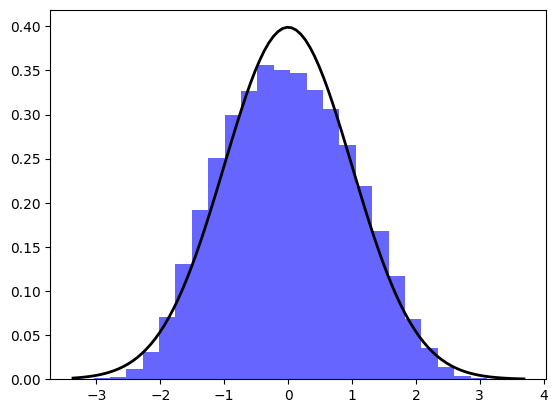

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['Z_SCORE_NOTA'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Generate histograms by grade

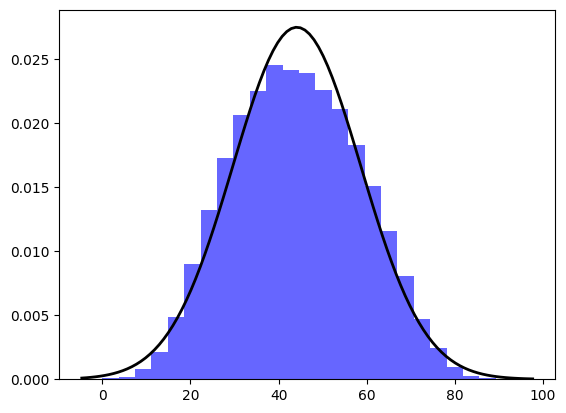

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['NOTA_GERAL'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Filter by grades far above or far below average

In [33]:
filtered_interest_data = interest_data.query("Z_SCORE_NOTA > 2.00 or Z_SCORE_NOTA < -2.00")
filtered_interest_data.count()

no_categoria_administrativa_ies    12374
no_organizacao_academica_ies       12374
no_regiao_ies                      12374
no_grau_academico                  12374
no_modalidade                      12374
faixa_etaria                       12374
tp_sexo                            12374
no_pres                            12374
nt_ger                             12374
q1                                 12374
q2                                 12374
q4                                 12374
q5                                 12374
q8                                 12374
q9                                 12374
q10                                12374
q15                                12374
q17                                12374
q21                                12374
q58                                12374
NOTA_GERAL                         12374
Z_SCORE_NOTA                       12374
CLASSIFICACAO_NOTA                 12374
dtype: int64

In [34]:
analysis_interest_columns = [
    'CLASSIFICACAO_NOTA',
    'no_categoria_administrativa_ies',
    'no_organizacao_academica_ies',
    'no_regiao_ies',
    'no_grau_academico',
    'no_modalidade',
    'faixa_etaria',
    'tp_sexo',
    'no_pres',
    'nt_ger',
    'q1', # Estado civil
    'q2', # Cor ou raça
    'q4', # Escolaridade do pai
    'q5', # Escolaridade da mãe
    'q8', # Renda total da família
    'q9', # Situação financeira
    'q10', # Situação de trabalho
    'q15', # Entrou por alguma política afirmativa?
    'q17', # Em que tipo de escola cursou o EM?
    'q21', # Alguém da família concluiu ensino superior?
    'q58', # Docentes utilizaram TICs como estratégia de ensino?
]

analysis_interest_data = filtered_interest_data[analysis_interest_columns]

## Save a CSV file with the analysis interest data

In [35]:
import os  

os.makedirs('analysis_interest_data', exist_ok=True)  
analysis_interest_data.to_csv('analysis_interest_data/analysis-interest-data-2019.csv')

analysis_file_data = pd.read_csv('analysis_interest_data/analysis-interest-data-2019.csv', sep=',', encoding='UTF-8')
analysis_file_data.head()

,CLASSIFICACAO_NOTA,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,...,q2,q4,q5,q8,q9,q10,q15,q17,q21,q58
0,NOTA: MUITO ABAIXO DA MÉDIA,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 42 e 49 anos,Masculino,Presente com resultado válido,11.3,...,Parda,Pai: Ensino Médio,Mãe: Ensino Superior - Graduação,Classe Social C,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Entrei com cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente
1,NOTA: MUITO ABAIXO DA MÉDIA,Pública Estadual,Universidade,Nordeste,Tecnológico,EaD,Entre 42 e 49 anos,Masculino,Presente com resultado válido,7.7,...,Parda,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social C,Tenho renda e não preciso de ajuda,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo
2,NOTA: MUITO ABAIXO DA MÉDIA,Privada sem fins lucrativos,Centro Universitário,Nordeste,Bacharelado,EaD,Entre 17 e 25 anos,Masculino,Presente com resultado válido,6.9,...,Parda,Pai: Ensino Médio,Mãe: Ensino Médio,Classe Social E,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente
3,NOTA: MUITO ABAIXO DA MÉDIA,Privada sem fins lucrativos,Centro Universitário,Nordeste,Bacharelado,EaD,Entre 17 e 25 anos,Masculino,Presente com resultado válido,10.3,...,Parda,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social E,Tenho renda e contribuo com o sustento da família,Trabalho eventualmente,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente
4,NOTA: MUITO ABAIXO DA MÉDIA,Privada sem fins lucrativos,Centro Universitário,Nordeste,Bacharelado,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,9.5,...,Branca,Pai: Nenhuma escolaridade,Mãe: Ensino Fundamental II,Classe Social D,"Tenho renda, recebo ajuda de familiares ou outros",Trabalho eventualmente,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente


## Convert table to transactions

In [36]:
transactions = analysis_interest_data.to_numpy()
transactions

array([['NOTA: MUITO ABAIXO DA MÉDIA', 'Pública Estadual',
        'Universidade', ..., 'EM: Todo em escola pública',
        'Tenho familiar com graduação',
        'IE Usou TICs: Concordo totalmente'],
       ['NOTA: MUITO ABAIXO DA MÉDIA', 'Pública Estadual',
        'Universidade', ..., 'EM: Todo em escola pública',
        'Não tenho familiar com graduação', 'IE Usou TICs: Concordo'],
       ['NOTA: MUITO ABAIXO DA MÉDIA', 'Privada sem fins lucrativos',
        'Centro Universitário', ..., 'EM: Todo em escola pública',
        'Tenho familiar com graduação',
        'IE Usou TICs: Concordo totalmente'],
       ...,
       ['NOTA: MUITO ABAIXO DA MÉDIA', 'Privada com fins lucrativos',
        'Centro Universitário', ..., 'EM: Todo em escola pública',
        'Tenho familiar com graduação',
        'IE Usou TICs: Concordo totalmente'],
       ['NOTA: MUITO ABAIXO DA MÉDIA', 'Privada com fins lucrativos',
        'Centro Universitário', ..., 'EM: Todo em escola pública',
        'Ten

## Create apriori rules

In [37]:
%run '../scripts/apriori-params-setup.py'
rules = apriori(transactions, min_support=support, min_confidence=confidence)
rules

<generator object apriori at 0x2af4877b0>

## Run apriori

In [ ]:
from datetime import datetime

initial_time = datetime.now()

results = pd.DataFrame(list(rules))

execution_time = datetime.now() - initial_time
print("Time to run apriori: " + str(execution_time))

In [ ]:
results

## Extract results to a new table

In [ ]:
from datetime import datetime

initial_time = datetime.now()

%run '../scripts/extractor.py'

organized_rules = extractor(results)

execution_time = datetime.now() - initial_time
print("Time to run extractor: " + str(execution_time))

organized_rules

In [ ]:
rules_count = len(organized_rules.index)
print("Count of itemsets: " + str(len(results.index)))
print("Count of association rules for support " + str((support *100)) + "% and confidence " + str((confidence * 100)) + "%: " + str(rules_count))

## Save results to a new CSV file

In [ ]:
import os  

os.makedirs('results', exist_ok=True)  
organized_rules.to_csv('results/organized-associations-2019.csv')  